C:\Users\91758\AppData\Local\Temp\ipykernel_12924\2500055813.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(image_data_tsne[:, 0], image_data_tsne[:, 1], c=numeric_labels,  cmap=plt.cm.get_cmap("jet", 10))


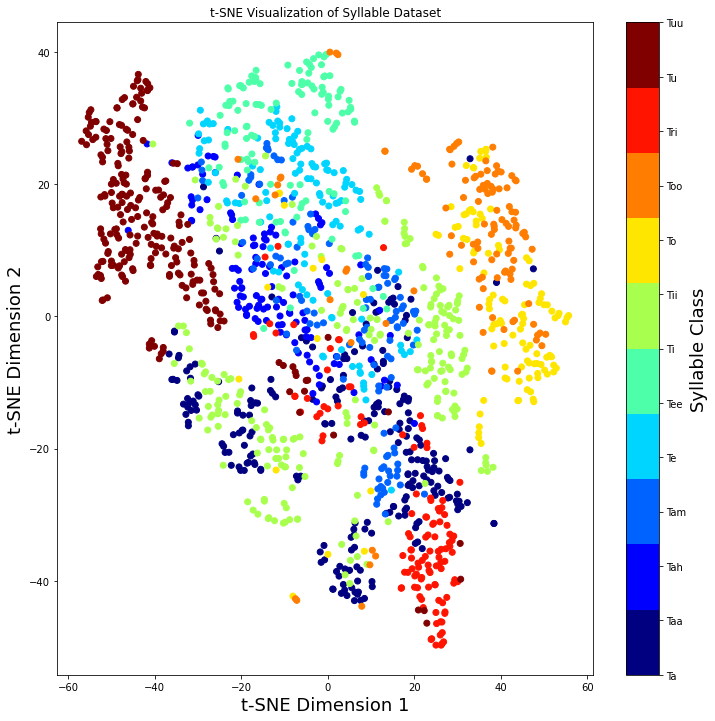

In [2]:
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Set the path to the base directory containing 13 subfolders
base_data_dir = "C:\\Users\\91758\\Downloads\\padded images"

# Get a list of subdirectories within the base directory
subdirs = [os.path.join(base_data_dir, subdir) for subdir in os.listdir(base_data_dir) if os.path.isdir(os.path.join(base_data_dir, subdir))]

# Set image dimensions
image_width, image_height = 256, 256

# Initialize lists to store image data and labels
image_data = []
labels = []

# Load and preprocess images from each subdirectory
for subdir_idx, subdir_path in enumerate(subdirs):
    subdir_name = os.path.basename(subdir_path)
    for image_file in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, image_file)
        image = Image.open(image_path).convert("L")
        image = ImageOps.fit(image, (image_width, image_height), method=Image.LANCZOS)
        image_array = np.array(image)
        image_data.append(image_array)
        labels.append(subdir_name)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Flatten image data
image_data_flattened = image_data.reshape(image_data.shape[0], -1)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
image_data_tsne = tsne.fit_transform(image_data_flattened)

# Create a mapping from unique class labels to integers
unique_labels = np.unique(labels)
class_label_map = {label: i for i, label in enumerate(unique_labels)}

# Convert labels to numeric values using the mapping
numeric_labels = np.array([class_label_map[label] for label in labels])

# Plot the t-SNE visualization
# plt.figure(figsize=(12, 12))
# scatter = plt.scatter(image_data_tsne[:, 0], image_data_tsne[:, 1], c=numeric_labels, cmap=plt.cm.get_cmap("jet", len(unique_labels)))
# plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Class', format=plt.FuncFormatter(lambda val, tick_num: unique_labels[int(val)]),fontsize=18)
# plt.title("t-SNE Visualization of Syllable Classes",fontsize=18)
# plt.show()
# plt.figure(figsize=(12, 12))
# scatter = plt.scatter(image_data_tsne[:, 0], image_data_tsne[:, 1], c=numeric_labels, cmap=plt.cm.get_cmap("jet", len(unique_labels)))
# plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Class', format=plt.FuncFormatter(lambda val, tick_num: unique_labels[int(val)]), fontsize=18)
# plt.title("t-SNE Visualization of Syllable Classes", fontsize=18)
# plt.xlabel("t-SNE Dimension 1", fontsize=16)  # Label for the x-axis
# plt.ylabel("t-SNE Dimension 2", fontsize=16)  # Label for the y-axis
# plt.show()
plt.figure(figsize=(12, 12))
scatter = plt.scatter(image_data_tsne[:, 0], image_data_tsne[:, 1], c=numeric_labels,  cmap=plt.cm.get_cmap("jet", 10))
colorbar = plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Syllable Class', format=plt.FuncFormatter(lambda val, tick_num: unique_labels[int(val)]))
colorbar.ax.yaxis.label.set_fontsize(18)  # Set font size for colorbar label
plt.title("t-SNE Visualization of Syllable Dataset")
plt.xlabel("t-SNE Dimension 1",fontsize=18)
plt.ylabel("t-SNE Dimension 2",fontsize=18)
plt.show()